<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:black;
           font-size:140%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 20px; color:white; text-align:center"><b>Email/SMS Spam Classifier</b></h3>
</div>

![](https://editor.analyticsvidhya.com/uploads/32086heading.jpeg)

* SMS Spam
* SMS spam is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS).
* I have use this Email/SMS Spam Classifier dataset to classify or detect any spam SMS which coming from differents media to solve NLP problems

## Import Required Libraries

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Exploratory Data Analysis(EDA)</b></h3>
</div>

In [2]:
#import DataFrame
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Remove Unwanted Columns
df=df.iloc[:,:2]

In [4]:
#Rename Columns
df=df.rename(columns={"v1":"label","v2":"text"})
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
#Total No of Spam and Not Spam Category
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

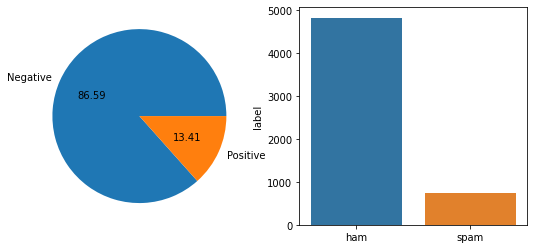

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['label'].value_counts(),labels=['Negative','Positive'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts(),data=df)
plt.show()

### **Conclusion**
  - As seen Data is Imbalance here first we process with imbalace data

In [7]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#shape of df
df.shape

(5572, 2)

In [9]:
#Check for Null Values
df.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
df['label'].value_counts()/df.shape[0]*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

## 1.1 Feature Engineering

* We Create Seperate features to extarct Some Information 
1. Total **No of Characters**
2. Total **No of Words**
3. Total **No of Sentences**

In [11]:
#1. Total No of Char
df['num_char']=df['text'].apply(len)

In [12]:
#2. Total No of Words
df['num_words']=df['text'].apply(lambda x: len(str(x).split()))

In [13]:
#3. Total No of Sentences
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [14]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


In [15]:
#Statistical Info about dataset
df.describe()

,num_char,num_words,num_sen
count,5572.000000,5572.000000,5572.000000
mean,80.118808,15.494436,1.970747
std,59.690841,11.329427,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,61.000000,12.000000,1.000000
75%,121.000000,23.000000,2.000000
max,910.000000,171.000000,28.000000


In [16]:
df[df['label']=='ham'].describe()

,num_char,num_words,num_sen
count,4825.000000,4825.000000,4825.000000
mean,71.023627,14.200622,1.808705
std,58.016023,11.424511,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,92.000000,19.000000,2.000000
max,910.000000,171.000000,28.000000


In [17]:
df[df['label']=='spam'].describe()

,num_char,num_words,num_sen
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,3.017403
std,29.183082,5.811898,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,8.000000


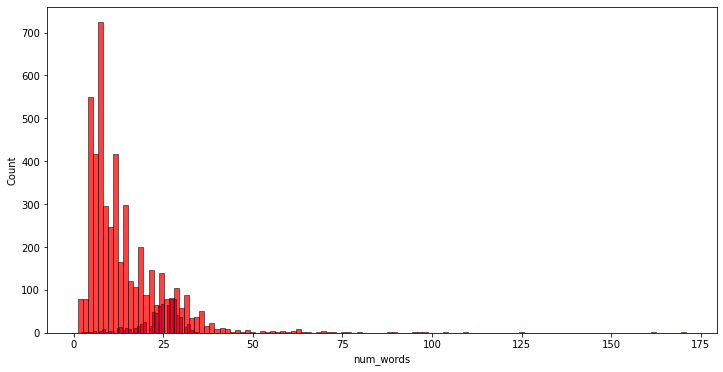

In [18]:
#Hist Plot for Spam and Not Spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=='spam']['num_words'],color='blue',bins=40)
sns.histplot(df[df['label']=='ham']['num_words'],color='red')
plt.show()

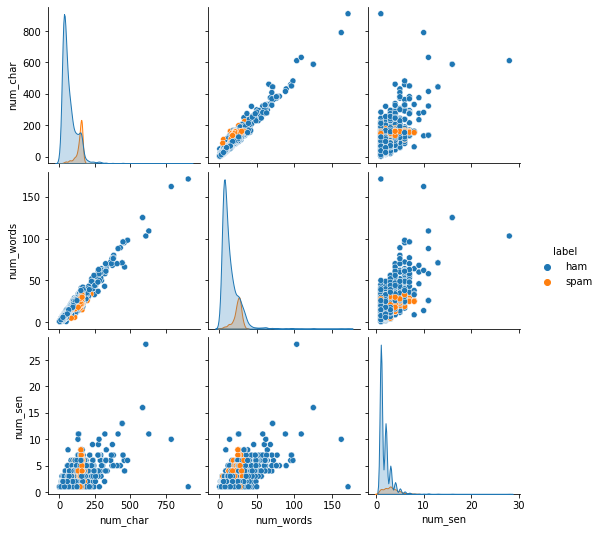

In [19]:
sns.pairplot(df,hue='label')
plt.show()

## 1.2 Handle Outliers

In [20]:
#Remove few Outliers present in dataset
i=df[df['num_char']>500].index
df.drop(i,axis=0,inplace=True)

In [21]:
df=df.reset_index()
df.drop("index",inplace=True,axis=1)

In [22]:
df

,label,text,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5561,spam,This is the 2nd time we have tried 2 contact u...,161,30,4
5562,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5563,ham,"Pity, * was in mood for that. So...any other s...",57,10,2
5564,ham,The guy did some bitching but I acted like i'd...,125,26,1


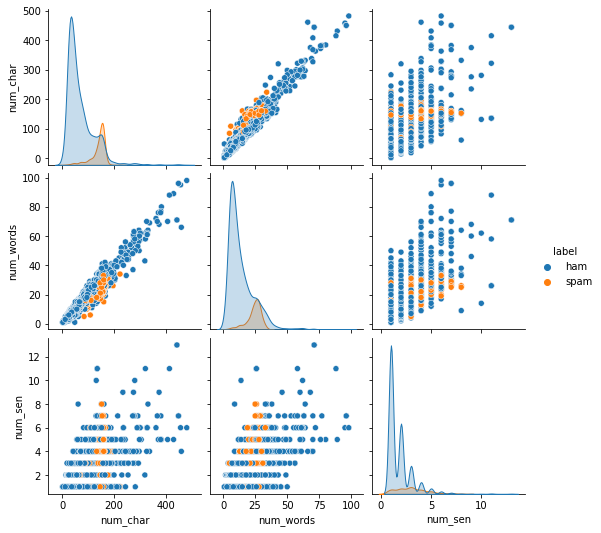

In [23]:
sns.pairplot(df,hue='label')
plt.show()

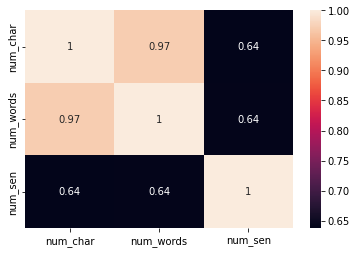

In [24]:
#HeatMap
sns.heatmap(df.corr(),annot=True)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Preprocessing</b></h3>
</div>

In [25]:
#Import lib required for text processing
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
#Stopwards 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Clean or Handle Text Data
1. Remove **Web Links**
2. Remove **Numbers**
3. Remove **Emails**

In [28]:
#User Define Funtion for Text processing 
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

In [29]:
#Call Function
df['text'] = df['text'].apply(remove_website_links)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_emails)

### **Create Common function to Clean or process Text Data**
1. **Lower casing** to avoids duplicates
2. **Tokenization** sentences
3. Remove **Specials characters**
4. Remove **Stopwords**
5. Remove **punctuation**
6. **Stemming**

In [30]:
#Create Common Function 
def transform_text(text):
    #1.lower casing
    text=text.lower()
    
    #2.tokenization
    lst=nltk.word_tokenize(text)
    
    #3.remove spcl characters stopwords and punctuation
    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)
            
    #4.stemming        
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()   

In [31]:
#call function
df['text'] = df['text'].apply(transform_text)
df['num_words_transform']=df['text'].apply(lambda x: len(str(x).split()))

In [32]:
df

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7
...,...,...,...,...,...,...
5561,spam,2nd time tri 2 contact u pound prize 2 claim e...,161,30,4,17
5562,ham,b go esplanad fr home,37,8,1,5
5563,ham,piti mood suggest,57,10,2,3
5564,ham,guy bitch act like interest buy someth els nex...,125,26,1,13


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Data Visualization</b></h3>
</div>

In [33]:
#conda install -c conda-forge wordcloud

### Most common words used for Spam Text

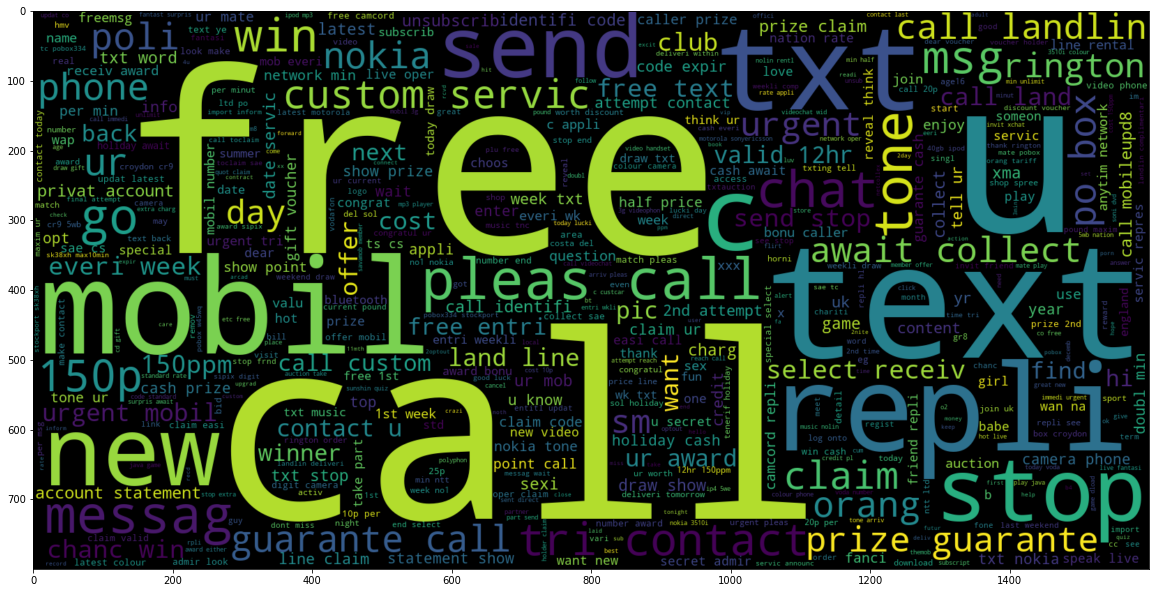

In [34]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(df[df.label == 'spam'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Most common words used for Not spam Text or Ham 

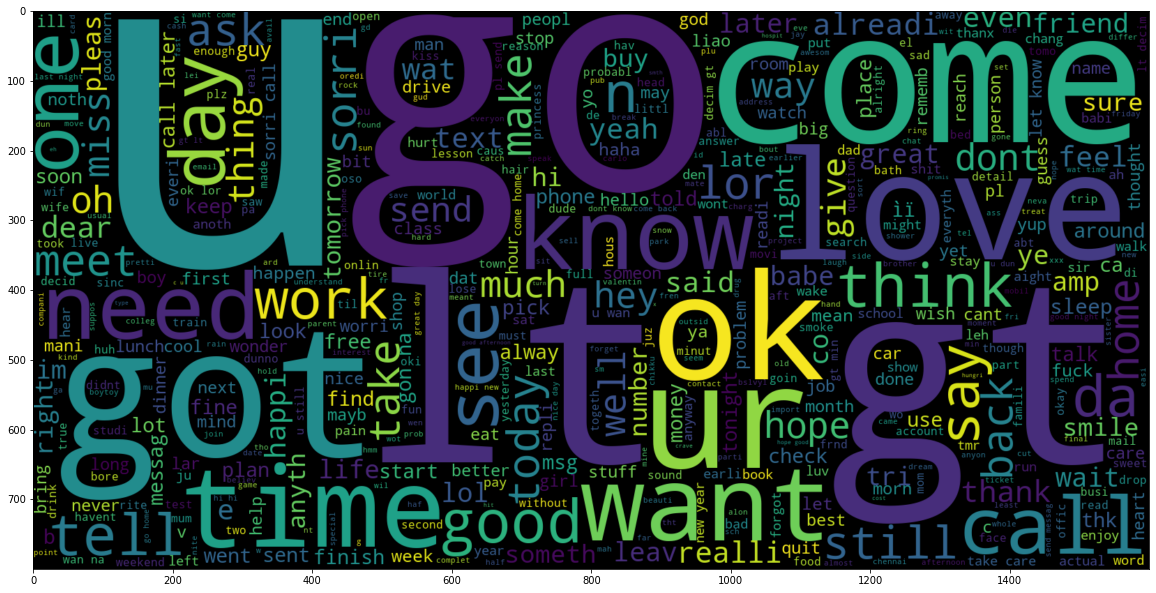

In [35]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500).generate(" ".join(df[df.label == 'ham'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [36]:
df.head()

,label,text,num_char,num_words,num_sen,num_words_transform
0,ham,go jurong point crazi avail bugi n great world...,111,20,2,16
1,ham,ok lar joke wif u oni,29,6,2,6
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,ham,u dun say earli hor u c alreadi say,49,11,1,9
4,ham,nah think goe usf live around though,61,13,1,7


In [37]:
df['label']=df['label'].replace({'spam':0,'ham':1})

### Not Spam Words / Ham

In [38]:
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

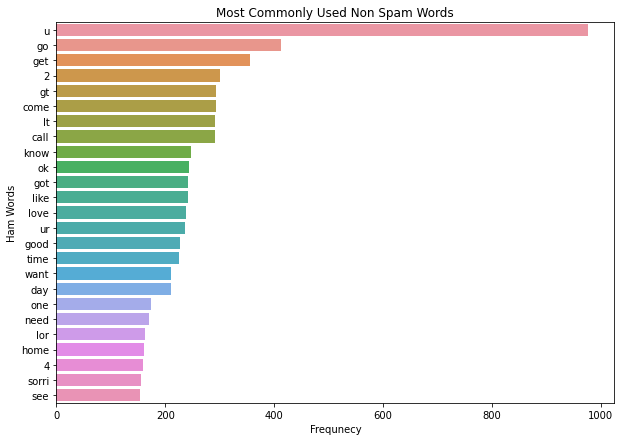

In [39]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

### Spam Words

In [40]:
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

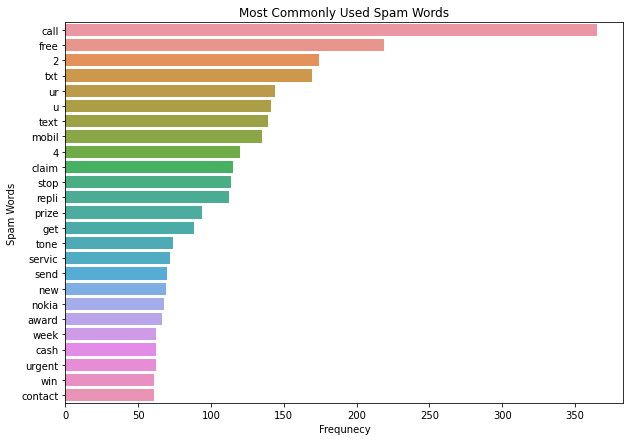

In [41]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

### Compare Total No of charactres & words in spam and non spam text  

### 1. No of Characters in Spam and Ham Text

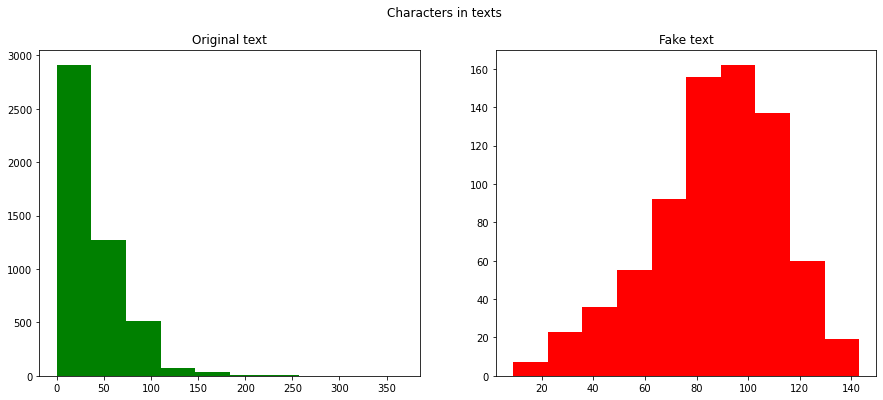

In [42]:
#Characters Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['label']==1]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['label']==0]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

### 2. No of Words in Spam and Ham Text

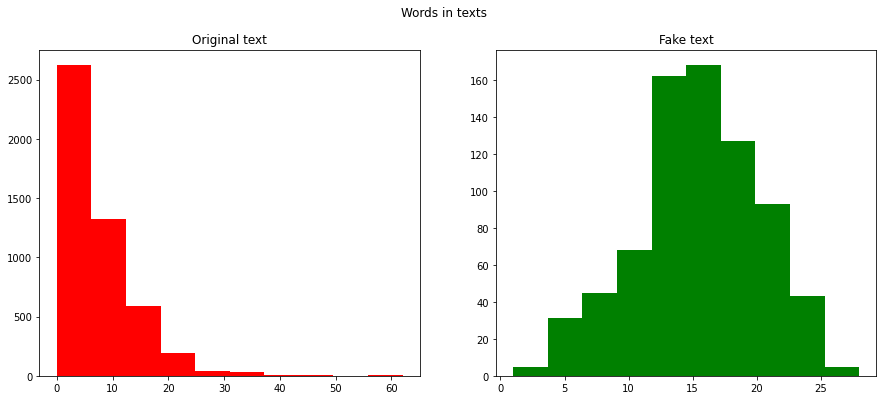

In [43]:
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['label']==1]['num_words_transform']
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['num_words_transform']
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

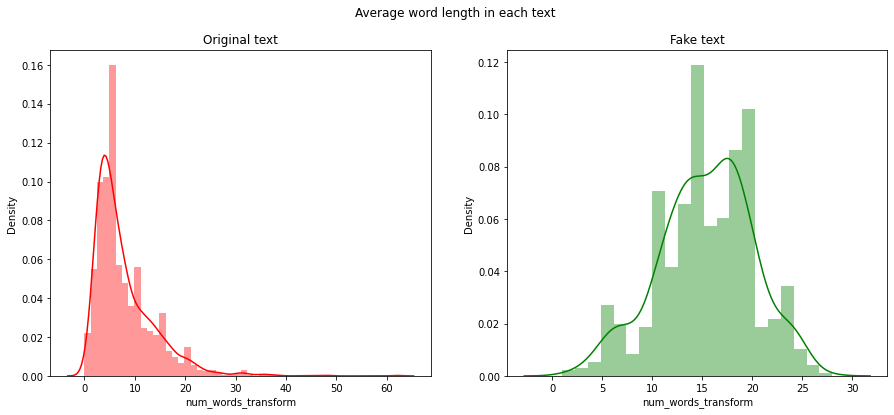

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word=df[df['label']==1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

### **Conclusion**
  - After visualize we can conclude that spam text has more words and characters as compare to Ham text
  - Average characters includes in **spam SMS** is around **90 characters**
  - Average words includes in **spam SMS** is around **15 words**

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Model Building</b></h3>
</div>

### Text Vecorization

In [45]:
#Text Vecorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

### Input Output Selection

In [46]:
#Input and Output Features
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [47]:
X.shape

(5566, 3000)

In [48]:
X.shape

(5566,)

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Imports Libraries

In [51]:
#Model Training
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
#Imports Lib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [53]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred1))
print("Precision Score -",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Accuracy Score - 0.8491921005385996
Precision Score - 0.9759326113116726
[[135  20]
 [148 811]]


In [54]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9793536804308797
Precision Score - 0.9775510204081632
[[133  22]
 [  1 958]]


In [55]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

for i,model in classifiers.items():
    cv_score=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=5)
    print("Mean Accuracy :",i,"--",cv_score.mean().round(3))

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b> Model Evaluation</b></h3>
</div>

In [56]:
#Common Function for model train
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [57]:
svc=SVC(kernel='sigmoid', gamma=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9802513464991023, 0.9805128205128205, 0.9847259658580413)

In [58]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()

For  svc
Accuracy -  0.9802513464991023
Precision -  0.9805128205128205

For  knc
Accuracy -  0.9102333931777379
Precision -  0.9055712936732767

For  mnb
Accuracy -  0.9793536804308797
Precision -  0.9775510204081632

For  dtc
Accuracy -  0.9299820466786356
Precision -  0.9365708622398414

For  lr
Accuracy -  0.9622980251346499
Precision -  0.9626639757820383

For  rfc
Accuracy -  0.9721723518850988
Precision -  0.9715447154471545

For  adb
Accuracy -  0.966786355475763
Precision -  0.9713701431492843

For  xgb
Accuracy -  0.9748653500897666
Precision -  0.9745158002038736

For  gbc
Accuracy -  0.9551166965888689
Precision -  0.954045954045954



In [59]:
df1=pd.DataFrame({'Algorithm':classifiers.keys(),'Precision':precision_scores,
                  'Test Accuracy':accuracy_scores,'Train Accuracy':train_accuracy_score}).round(3)

In [60]:
df2=df1.sort_values(['Precision','Test Accuracy'],ascending=False)
df2

,Algorithm,Precision,Test Accuracy,Train Accuracy
0,svc,0.981,0.980,0.985
2,mnb,0.978,0.979,0.983
7,xgb,0.975,0.975,0.985
5,rfc,0.972,0.972,1.000
6,adb,0.971,0.967,0.975
4,lr,0.963,0.962,0.965
8,gbc,0.954,0.955,0.966
3,dtc,0.937,0.930,0.947
1,knc,0.906,0.910,0.931


In [61]:
df3 = pd.melt(df2, id_vars = "Algorithm")

In [62]:
df3.head()

,Algorithm,variable,value
0,svc,Precision,0.981
1,mnb,Precision,0.978
2,xgb,Precision,0.975
3,rfc,Precision,0.972
4,adb,Precision,0.971


## Visualize Accuracy of differents models

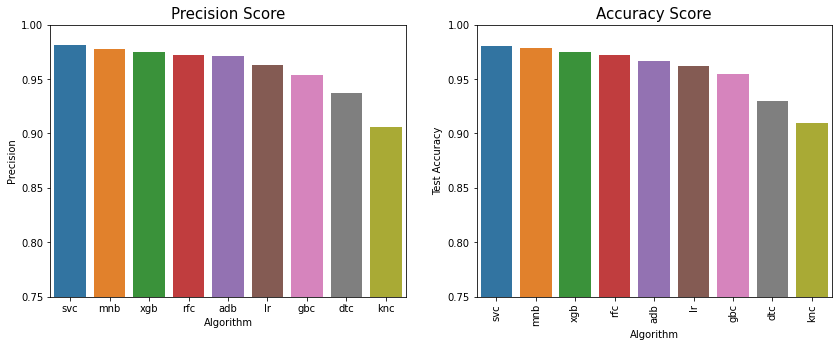

In [63]:
#Visualize accuracy of differents models
#sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x="Algorithm",y="Precision",data=df2)
plt.title("Precision Score",size=15)
plt.ylim(0.75,1.0)
plt.subplot(1,2,2)
sns.barplot(x="Algorithm",y="Test Accuracy",data=df2)
plt.ylim(0.75,1.0)
plt.title("Accuracy Score",size=15)
plt.xticks(rotation='vertical')
plt.show()

## Cross Validation  of Top Models

In [64]:
top_classifiers={"Support Vector Classifier":SVC(kernel='sigmoid', gamma=1.0),
             "Multinomial Naive Bayes" : MultinomialNB(),
             "Random Forest" : RandomForestClassifier(n_estimators=50, random_state=2)
            }

In [65]:
from time import time

### Confusiom Matrix,  Accuracy, Precision & Process Time 

Classifier :  Support Vector Classifier
Processing Time :  93.913
Mean Accuracy :  0.978
Precision Score :  0.981


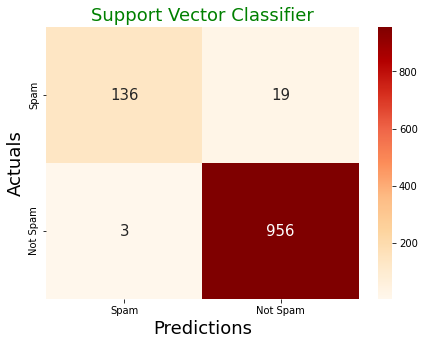

Classifier :  Multinomial Naive Bayes
Processing Time :  1.185
Mean Accuracy :  0.976
Precision Score :  0.978


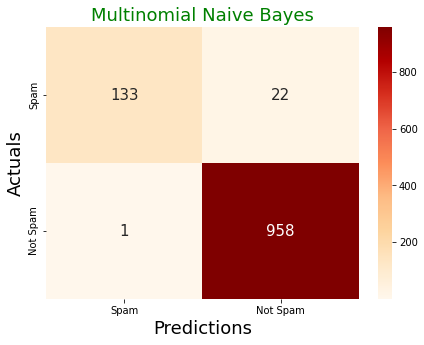

Classifier :  Random Forest
Processing Time :  54.865
Mean Accuracy :  0.978
Precision Score :  0.972


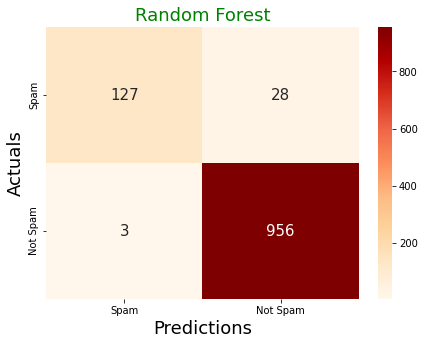

In [66]:
for i,model in top_classifiers.items():
    print("Classifier : ",i)
    t0 = time()
    cv_score=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=10)
    t1 = time()
    tf=t1-t0
    print("Processing Time : ",np.round(tf,3))
    print("Mean Accuracy : ",cv_score.mean().round(3))
    mb=model
    mb.fit(X_train,y_train)
    y_pred = mb.predict(X_test)
    precision = precision_score(y_test,y_pred)
    print("Precision Score : ",np.round(precision,3))
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="OrRd",
                fmt="d",cbar=True,xticklabels=['Spam','Not Spam'],yticklabels=['Spam','Not Spam'],
                annot_kws={"fontsize":15})
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(i,fontsize=18,color='green')
    plt.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:red;
           font-size:120%;
           font-family:#afd511;
           letter-spacing:0.5px">

<h3 style="padding: 13px; color:white; text-align:center"><b>Conclusion</b></h3>
</div>

  - After Train with Multiple algorithms, We can conclude that **Support Vector Classifer(SVC)** and **Multinomial Naive Bayes(mnb)** are best algorithms to choose to sovle given NLP problem with very good Accuracy around 0.97
  - If we want **only higher precision accuracy** there is **No matter of Processing Time** then prefer **Support Vector Classifer(SVC)** is Best Option.
  - If Both **Accuracy and processing time is Important Factors** then **Multinomial Naive Bayes(mnb)** Perform Well With very less proceesing time and good accuracy

** Here In Our case We will consider **Multinomial Naive Bayes(mnb)** and Deploy

In [67]:
import pickle

In [68]:
#import pickle
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model2.pkl','wb'))

### Please Upvote If You Like my works!!!